In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
import matplotlib.pyplot as plt 
import datetime as dt 
import numpy.linalg as lin 

PATH_classSize = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/2010-2011_Class_Size_-_School-level_detail.csv" 
PATH_ApTest = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/AP__College_Board__2010_School_Level_Results.csv"
PATH_graduateOutcome = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv"
PATH_mathTest = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/NYS_Math_Test_Results_By_Grade_2006-2011_-_School_Level_-_All_Students.csv"
PATH_SAT_result = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/SAT_Results.csv"
PATH_Attendent = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/School_Attendance_and_Enrollment_Statistics_by_District__2010-11_.csv"
PATH_Demographics = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/School_Demographics_and_Accountability_Snapshot_2006-2012.csv"
PATH_nysd = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/nysd.csv"
PATH_progress = "/Users/aijiechen/Desktop/2016_Fall/data_science/Assignment/Project_SAT/data science new topic/School_Progress_Report_2010-2011.csv"




# class size data

In [2]:
data_clssSize = pd.read_csv(PATH_classSize)
data_clssSize.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [3]:
data_clssSize["DBN"] = data_clssSize.apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data_clssSize.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [4]:
data_clssSize = data_clssSize[data_clssSize["GRADE "] == "09-12"]
data_clssSize = data_clssSize[data_clssSize["PROGRAM TYPE"] == "GEN ED"]
data_clssSize = data_clssSize.groupby("DBN").agg(np.mean)
data_clssSize.reset_index(inplace=True)
data_clssSize.shape

(583, 8)

In [5]:
classSize = data_clssSize.ix[0:,['DBN','AVERAGE CLASS SIZE']]
classSize.head()

,DBN,AVERAGE CLASS SIZE
0,01M292,22.564286
1,01M332,22.000000
2,01M378,33.000000
3,01M448,22.231250
4,01M450,21.200000


In [6]:
classSize.shape

(583, 2)

In [7]:
data_ApTest = pd.read_csv(PATH_ApTest)
data_ApTest.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


# Math Test

In [8]:
data_mathTest=pd.read_csv(PATH_mathTest)
data_mathTest.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%


In [9]:
data_mathTest.dtypes

DBN                 object
Grade               object
Year                 int64
Category            object
Number Tested        int64
Mean Scale Score    object
Level 1 #           object
Level 1 %           object
Level 2 #           object
Level 2 %           object
Level 3 #           object
Level 3 %           object
Level 4 #           object
Level 4 %           object
Level 3+4 #         object
Level 3+4 %         object
dtype: object

In [10]:
data_mathTest = data_mathTest[data_mathTest["Year"] == 2011]
data_mathTest = data_mathTest[data_mathTest["Grade"] == 'All Grades']
mathTest = data_mathTest.ix[0:,['DBN','Mean Scale Score']]
mathTest.shape

(1132, 2)

In [11]:
mathTest.head()

,DBN,Mean Scale Score
24,01M015,669
50,01M019,683
75,01M020,682
117,01M034,673
142,01M063,689


# Attedent

In [12]:
data_Attendent = pd.read_csv(PATH_Attendent)
data_Attendent.head()

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,DISTRICT 01,91.18%,12367
1,DISTRICT 02,89.01%,60823
2,DISTRICT 03,89.28%,21962
3,DISTRICT 04,91.13%,14252
4,DISTRICT 05,89.08%,13170


In [13]:
attendance_temp = data_Attendent
attendance_temp['YTD % Attendance (Avg)'] = attendance_temp.apply(lambda x: x['YTD % Attendance (Avg)'].replace('%', ''), axis=1)
attendance_temp['District'] = data_Attendent.apply(lambda x: x['District'].replace('DISTRICT ', ''), axis=1)
attendance_temp = attendance_temp.drop([33, 34])
attendance_temp['District'] = attendance_temp.apply(lambda x: x['District'].replace('SPECIAL ED ', ''), axis=1)
attendance_temp.rename(columns={'YTD % Attendance (Avg)':'Avg_attendance', 'YTD Enrollment(Avg)':'Avg_enrollment'},inplace=True)
attendance_temp.head()

,District,Avg_attendance,Avg_enrollment
0,01,91.18,12367
1,02,89.01,60823
2,03,89.28,21962
3,04,91.13,14252
4,05,89.08,13170


In [14]:
attendance_final =attendance_temp
attendance_final.dtypes


District          object
Avg_attendance    object
Avg_enrollment     int64
dtype: object

In [15]:
attendance_final["Avg_attendance"] = attendance_final["Avg_attendance"].convert_objects(convert_numeric=True)



/Users/aijiechen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [16]:
attendance_final.dtypes

District           object
Avg_attendance    float64
Avg_enrollment      int64
dtype: object

# Demograph

In [17]:
data_Demographics = pd.read_csv(PATH_Demographics)
data_Demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [18]:
data_Demographics.tail(20)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
10055,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20062007,93.2,NaN,255,NaN,NaN,NaN,NaN,...,62,24.3,184,72.2,0,0.0,131.0,51.4,124.0,48.6
10056,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20072008,96.1,NaN,266,NaN,NaN,NaN,NaN,...,58,21.8,200,75.2,0,0.0,133.0,50.0,133.0,50.0
10057,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20082009,92.8,NaN,257,NaN,NaN,NaN,NaN,...,52,20.2,201,78.2,0,0.0,133.0,51.8,124.0,48.2
10058,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20092010,,94.2,251,NaN,NaN,NaN,NaN,...,46,18.3,201,80.1,0,0.0,137.0,54.6,114.0,45.4
10059,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20102011,,93.6,238,NaN,NaN,NaN,NaN,...,42,17.6,189,79.4,1,0.4,128.0,53.8,110.0,46.2
10060,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,20112012,NaN,81.4,263,,,,,...,34,12.9,209,79.5,4,1.5,137.0,52.1,126.0,47.9
10061,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL,20052006,86.1,NaN,300,NaN,NaN,NaN,NaN,...,54,18.0,231,77.0,1,0.3,122.0,40.7,178.0,59.3
10062,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL,20062007,89.1,NaN,417,NaN,NaN,NaN,NaN,...,72,17.3,332,79.6,2,0.5,172.0,41.2,245.0,58.8
10063,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL,20072008,86.6,NaN,458,NaN,NaN,NaN,NaN,...,76,16.6,373,81.4,2,0.4,192.0,41.9,266.0,58.1
10064,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL,20082009,86.4,NaN,489,NaN,NaN,NaN,NaN,...,78,16.0,400,81.8,4,0.8,225.0,46.0,264.0,54.0


In [19]:
data_Demographics.shape

(10075, 38)

In [20]:
data_Demographics["schoolyear"] =  data_Demographics[data_Demographics["schoolyear"] >= 20100101]
data_Demographics.tail()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
10070,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,NaN,85.6,NaN,355,NaN,NaN,NaN,NaN,...,151,42.5,198,55.8,5,1.4,181.0,51.0,174.0,49.0
10071,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,NaN,65.2,NaN,383,NaN,NaN,NaN,NaN,...,132,34.5,245,64.0,2,0.5,206.0,53.8,177.0,46.2
10072,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,NaN,,89.2,395,NaN,NaN,NaN,NaN,...,146,37.0,242,61.3,3,0.8,199.0,50.4,196.0,49.6
10073,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,32K564,,88.2,420,NaN,NaN,NaN,NaN,...,166,39.5,242,57.6,8,1.9,209.0,49.8,211.0,50.2
10074,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,32K564,NaN,81.8,382,,,,,...,137,35.9,235,61.5,7,1.8,169.0,44.2,213.0,55.8


In [21]:
data_Demographics.shape

(10075, 38)

In [22]:
data_Demographics

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,NaN,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,NaN,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,NaN,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,NaN,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,NaN,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,01M015,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,01M015,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,NaN,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,NaN,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,NaN,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


In [23]:
data_nysd = pd.read_csv(PATH_nysd)
data_nysd.head()

,the_geom,SchoolDist,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.82049919995312 40.80101146...,25,175816.081000,4.436314e+08
1,MULTIPOLYGON (((-74.02552971543656 40.65147855...,20,95513.486010,2.427230e+08
2,MULTIPOLYGON (((-73.95671863064405 40.78660079...,3,52071.976405,1.134879e+08
3,MULTIPOLYGON (((-73.92133752419399 40.80085210...,4,52056.107857,5.262001e+07
4,MULTIPOLYGON (((-73.74344992332192 40.77824115...,26,125716.377003,4.249042e+08


# Sum SAT score

In [24]:
data_SAT_result = pd.read_csv(PATH_SAT_result)
data_SAT_result.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [25]:
data_SAT_result.dtypes

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

In [26]:
data_SAT_result["SAT Critical Reading Avg. Score"] = data_SAT_result["SAT Critical Reading Avg. Score"].convert_objects(convert_numeric=True)
data_SAT_result["SAT Math Avg. Score"] = data_SAT_result["SAT Math Avg. Score"].convert_objects(convert_numeric=True)
data_SAT_result["SAT Writing Avg. Score"] = data_SAT_result["SAT Writing Avg. Score"].convert_objects(convert_numeric=True)

data_SAT_result.dtypes
data_SAT_result["SAT_score"] = data_SAT_result["SAT Critical Reading Avg. Score"]+data_SAT_result["SAT Math Avg. Score"] +data_SAT_result["SAT Writing Avg. Score"]
data_SAT_result.head()


/Users/aijiechen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Users/aijiechen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/Users/aijiechen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [27]:
SAT = data_SAT_result.ix[0:,['DBN','SAT Math Avg. Score','SAT_score']]
SAT.shape

(478, 3)

In [28]:
data_ApTest.dtypes

DBN                                     object
SchoolName                              object
AP Test Takers                          object
Total Exams Taken                       object
Number of Exams with scores 3 4 or 5    object
dtype: object

In [29]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data_ApTest[col] = data_ApTest[col].convert_objects(convert_numeric=True)

data_ApTest.dtypes

/Users/aijiechen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

# school progress

In [30]:
data_progress = pd.read_csv(PATH_progress)
data_progress.head()

,DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M015,1,P.S. 015 Roberto Clemente,Irene Sanchez,EMS,Elementary,63.61,C,27.0,6.4,B,2.1,D,18.0,C,0.5,C
1,01M019,1,P.S. 019 Asher Levy,Jacqueline Flanagan,EMS,Elementary,49.48,B,48.7,7.8,B,5.2,D,35.1,A,0.5,C
2,01M020,1,P.S. 020 Anna Silver,James Lee,EMS,Elementary,56.65,B,48.2,7.7,B,7.4,C,31.1,B,2.0,A
3,01M034,1,P.S. 034 Franklin D. Roosevelt,Joyce Stallings Harte,EMS,K-8,67.97,C,39.8,7.5,B,11.3,B,18.5,C,2.5,B
4,01M063,1,P.S. 063 William McKinley,Darlene Despeignes,EMS,Elementary,58.85,B,49.0,8.1,B,10.4,B,29.0,B,1.5,B


In [31]:
school_grade_temp = data_progress[data_progress["SCHOOL LEVEL*"] == "High School"]
school_grade_temp = school_grade_temp.drop(["DISTRICT", "SCHOOL", "PRINCIPAL", "PROGRESS REPORT TYPE", "SCHOOL LEVEL*"], axis=1)
school_grade_temp.head()


,DBN,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
14,01M292,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
23,01M448,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C
25,01M450,2.26,A,77.0,12.9,A,18.4,A,38.7,B,7.0,A
27,01M509,1.78,C,54.0,6.7,D,15.7,B,30.6,C,1.0,B
30,01M539,3.48,A,71.9,7.7,C,21.8,A,42.4,A,NaN,B


In [32]:
school_grade_final = school_grade_temp
school_grade_final = school_grade_final.rename(columns={'\ufeffDBN':'DBN'})

# Merge data

## SAT Vs. class size

In [33]:
class_SAT = pd.merge(classSize, SAT, how='inner', on='DBN')
class_SAT.dropna()
class_SAT.head()

,DBN,AVERAGE CLASS SIZE,SAT Math Avg. Score,SAT_score
0,01M292,22.564286,404.0,1122.0
1,01M448,22.231250,423.0,1172.0
2,01M450,21.200000,402.0,1149.0
3,01M458,23.000000,401.0,1174.0
4,01M509,23.571429,433.0,1207.0


## SAT Vs. Math

In [34]:
Math_SAT = pd.merge(mathTest,SAT, how='inner', on='DBN')
Math_SAT.dropna()
Math_SAT.head()

,DBN,Mean Scale Score,SAT Math Avg. Score,SAT_score
0,01M292,650,404.0,1122.0
1,01M450,679,402.0,1149.0
2,01M539,728,574.0,1621.0
3,02M407,686,465.0,1424.0
4,02M408,698,490.0,1522.0


In [35]:
class_SAT['District'] = class_SAT.apply(lambda x: x['DBN'][0:2], axis=1)
class_SAT.head()

,DBN,AVERAGE CLASS SIZE,SAT Math Avg. Score,SAT_score,District
0,01M292,22.564286,404.0,1122.0,01
1,01M448,22.231250,423.0,1172.0,01
2,01M450,21.200000,402.0,1149.0,01
3,01M458,23.000000,401.0,1174.0,01
4,01M509,23.571429,433.0,1207.0,01


In [36]:
Class_Atten_SAT = pd.merge(class_SAT, attendance_final, how='inner', on='District')
Class_Atten_SAT.head()

,DBN,AVERAGE CLASS SIZE,SAT Math Avg. Score,SAT_score,District,Avg_attendance,Avg_enrollment
0,01M292,22.564286,404.0,1122.0,01,91.18,12367
1,01M448,22.231250,423.0,1172.0,01,91.18,12367
2,01M450,21.200000,402.0,1149.0,01,91.18,12367
3,01M458,23.000000,401.0,1174.0,01,91.18,12367
4,01M509,23.571429,433.0,1207.0,01,91.18,12367


# School grade

In [37]:
sat_size_atte_grade = pd.merge(Class_Atten_SAT, school_grade_final, how='inner', on='DBN')
sat_size_atte_grade.head()

,DBN,AVERAGE CLASS SIZE,SAT Math Avg. Score,SAT_score,District,Avg_attendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M292,22.564286,404.0,1122.0,01,91.18,12367,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
1,01M448,22.231250,423.0,1172.0,01,91.18,12367,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C
2,01M450,21.200000,402.0,1149.0,01,91.18,12367,2.26,A,77.0,12.9,A,18.4,A,38.7,B,7.0,A
3,01M509,23.571429,433.0,1207.0,01,91.18,12367,1.78,C,54.0,6.7,D,15.7,B,30.6,C,1.0,B
4,01M539,25.510526,574.0,1621.0,01,91.18,12367,3.48,A,71.9,7.7,C,21.8,A,42.4,A,NaN,B


In [38]:
sat_size_atte_grade.dtypes

DBN                                      object
AVERAGE CLASS SIZE                      float64
SAT Math Avg. Score                     float64
SAT_score                               float64
District                                 object
Avg_attendance                          float64
Avg_enrollment                            int64
PEER INDEX*                             float64
2010-2011 OVERALL GRADE                  object
2010-2011 OVERALL SCORE                 float64
2010-2011 ENVIRONMENT CATEGORY SCORE    float64
2010-2011 ENVIRONMENT GRADE              object
2010-2011 PERFORMANCE CATEGORY SCORE    float64
2010-2011 PERFORMANCE GRADE              object
2010-2011 PROGRESS CATEGORY SCORE       float64
2010-2011 PROGRESS GRADE                 object
2010-2011 ADDITIONAL CREDIT             float64
2009-10 PROGRESS REPORT GRADE            object
dtype: object

In [39]:
grade_remove_col = ["2010-2011 OVERALL GRADE", "2010-2011 ENVIRONMENT GRADE", "2010-2011 PERFORMANCE GRADE", "2010-2011 PROGRESS GRADE", "2010-2011 ADDITIONAL CREDIT", "2009-10 PROGRESS REPORT GRADE"]
sat_size_atte_grade_temp = sat_size_atte_grade.drop(grade_remove_col, axis=1)
sat_size_atte_grade_temp = sat_size_atte_grade_temp.dropna()
sat_size_atte_grade_temp = sat_size_atte_grade_temp.rename(columns={"Total_Avg":"SAT_Avg", 'Avg_ttendance':"Avg_atendance" })
sat_size_atte_grade_temp.head()

,DBN,AVERAGE CLASS SIZE,SAT Math Avg. Score,SAT_score,District,Avg_attendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PROGRESS CATEGORY SCORE
0,01M292,22.564286,404.0,1122.0,01,91.18,12367,1.81,49.8,6.9,12.8,30.1
1,01M448,22.231250,423.0,1172.0,01,91.18,12367,2.03,57.6,6.9,13.9,35.8
2,01M450,21.200000,402.0,1149.0,01,91.18,12367,2.26,77.0,12.9,18.4,38.7
3,01M509,23.571429,433.0,1207.0,01,91.18,12367,1.78,54.0,6.7,15.7,30.6
4,01M539,25.510526,574.0,1621.0,01,91.18,12367,3.48,71.9,7.7,21.8,42.4


In [40]:
sat_size_atte_grade_temp.dtypes

DBN                                      object
AVERAGE CLASS SIZE                      float64
SAT Math Avg. Score                     float64
SAT_score                               float64
District                                 object
Avg_attendance                          float64
Avg_enrollment                            int64
PEER INDEX*                             float64
2010-2011 OVERALL SCORE                 float64
2010-2011 ENVIRONMENT CATEGORY SCORE    float64
2010-2011 PERFORMANCE CATEGORY SCORE    float64
2010-2011 PROGRESS CATEGORY SCORE       float64
dtype: object

# Merchine lerning procoss

In [41]:
import seaborn as sns
%matplotlib inline

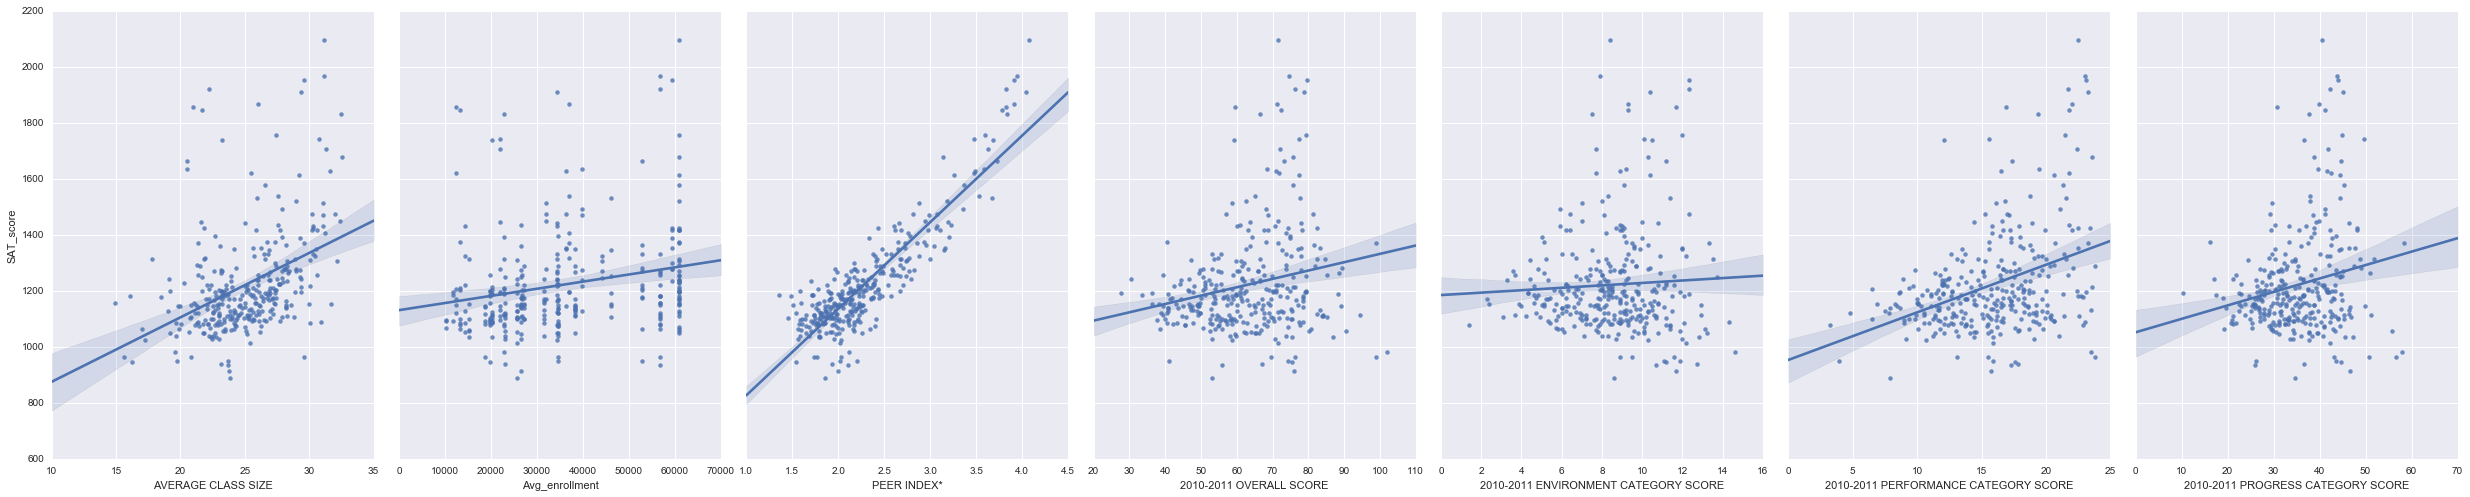

In [42]:
sns.pairplot(sat_size_atte_grade_temp, x_vars=['AVERAGE CLASS SIZE',
                                               'Avg_enrollment',
                                               'PEER INDEX*',
                                               '2010-2011 OVERALL SCORE',
                                               '2010-2011 ENVIRONMENT CATEGORY SCORE',
                                               '2010-2011 PERFORMANCE CATEGORY SCORE',
                                               '2010-2011 PROGRESS CATEGORY SCORE',
                                              ],
             y_vars='SAT_score', size=7, aspect=0.7, kind='reg')


NameError: name 'X' is not defined